In [2]:
import pandas as pd

In [3]:
data_path = "./Bladder_GSE31189.csv"

In [4]:
data = pd.read_csv(data_path)

In [5]:
name = pd.read_csv("list_output.txt", header=None)

In [6]:
print(data.shape)
print(data.head(2))  # 기본적으로 상위 5개 행 출력
print(data.iloc[:, 0])  # 첫 번째 열
print(data.iloc[:, 2])  # 세 번째 열



(85, 54677)
   samples               type  1007_s_at   1053_at    117_at    121_at  \
0      124  tumoral_urothelia   5.448550  2.855473  3.956391  6.990753   
1      125  tumoral_urothelia   5.948208  2.795529  4.125916  7.085531   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0   2.515888  4.532908  5.148095  3.420617  ...             12.355006   
1   3.161936  4.603227  5.619804  3.194219  ...             12.707785   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             12.073772            13.375017            13.129036   
1             12.626975            14.021214            13.727221   

   AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-TrpnX-3_at  \
0       14.285014       12.222636       13.764253         2.635243   
1        8.480108        3.431950        4.462056         2.317526   

   AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0         3.087296         2.749863  
1         2.760757         2.868030  

[2 rows x 5

In [7]:

# 라벨링 정보 분리 (samples와 type 열만 따로 저장)
label_data = data[['samples', 'type']]
#label_data.to_csv('label_data.csv', index=False)  # 라벨링 정보 저장


# 유전자 발현 데이터만 분리 (samples와 type 열 제외)
gene_expression_data = data.drop(columns=['samples', 'type'])
#gene_expression_data.to_csv('gene_expression_data.csv', index=False)  # 유전자 발현 데이터 저장


In [8]:
print(gene_expression_data.head(2))
print(label_data.head(2))

   1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at   1316_at  \
0   5.448550  2.855473  3.956391  6.990753   2.515888  4.532908  5.148095   
1   5.948208  2.795529  4.125916  7.085531   3.161936  4.603227  5.619804   

    1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  3.420617   3.378807  3.022539  ...             12.355006   
1  3.194219   3.287409  2.764392  ...             12.707785   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             12.073772            13.375017            13.129036   
1             12.626975            14.021214            13.727221   

   AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-TrpnX-3_at  \
0       14.285014       12.222636       13.764253         2.635243   
1        8.480108        3.431950        4.462056         2.317526   

   AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0         3.087296         2.749863  
1         2.760757         2.868030  

[2 rows x 54675 columns]
   samples         

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [10]:
X = gene_expression_data.values
y = label_data['type'].values

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 예: tumor -> 0, non_tumor -> 1

In [12]:
print(X)
print(y.shape)

[[5.44855047 2.85547287 3.95639111 ... 2.63524305 3.0872959  2.74986292]
 [5.94820816 2.79552877 4.12591576 ... 2.31752635 2.7607569  2.86802983]
 [5.49623909 2.88156934 4.07656101 ... 2.32313295 2.69599462 2.6706242 ]
 ...
 [6.18813431 2.9007399  4.73405634 ... 2.1427781  2.38023166 2.29607142]
 [6.35865158 3.43926188 3.63315948 ... 2.16832783 2.30002383 2.28086162]
 [6.2930911  2.87422621 4.02052646 ... 2.1292677  2.28813348 2.32520466]]
(85,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
print(X_train.shape)
print(y_train.shape)

(59, 54675)
(59,)


# RandomForestClassifier

In [15]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, brier_score_loss, roc_auc_score
import shap


/home/younggun0816/anaconda3/envs/XAI/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
rf = RandomForestClassifier(n_estimators=2, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률값만 사용


# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Classification Report 출력
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Brier Score 계산 (클래스 1 확률값 사용)
brier_score = brier_score_loss(y_test, y_pred_proba)
print(f"\nBrier Score: {brier_score:.4f}")

# AUC 계산 (클래스 1 확률값 사용)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")


Accuracy: 65.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.77      0.62      0.69        16

    accuracy                           0.65        26
   macro avg       0.65      0.66      0.65        26
weighted avg       0.68      0.65      0.66        26


Brier Score: 0.2692
AUC: 0.6750


## PFI

In [44]:
# PFI 계산
result = permutation_importance(
    rf, 
    X, 
    y, 
    scoring='accuracy', 
    n_repeats=3, 
    n_jobs=-1, 
    random_state=42
)

In [45]:

# 중요도 정렬 (상위 20개)
sorted_indices = result.importances_mean.argsort()[::-1]  # 중요도 기준 내림차순 정렬
top_20_indices = sorted_indices[:20]  # 상위 20개 인덱스 추출

# 상위 20개 특성 출력
print("Top 20 Features by Importance:")
for i in top_20_indices:
    print(f"{gene_expression_data.columns[i]}: {result.importances_mean[i]:.3f}")

Top 20 Features by Importance:
226426_at: 0.102
214210_at: 0.094
1562223_at: 0.075
1558466_at: 0.071
226085_at: 0.047
210929_s_at: 0.039
244724_at: 0.024
224407_s_at: 0.024
233981_at: 0.012
206350_at: 0.012
208808_s_at: 0.000
208809_s_at: 0.000
208810_at: 0.000
208812_x_at: 0.000
208813_at: 0.000
208814_at: 0.000
208815_x_at: 0.000
208816_x_at: 0.000
208811_s_at: 0.000
208807_s_at: 0.000


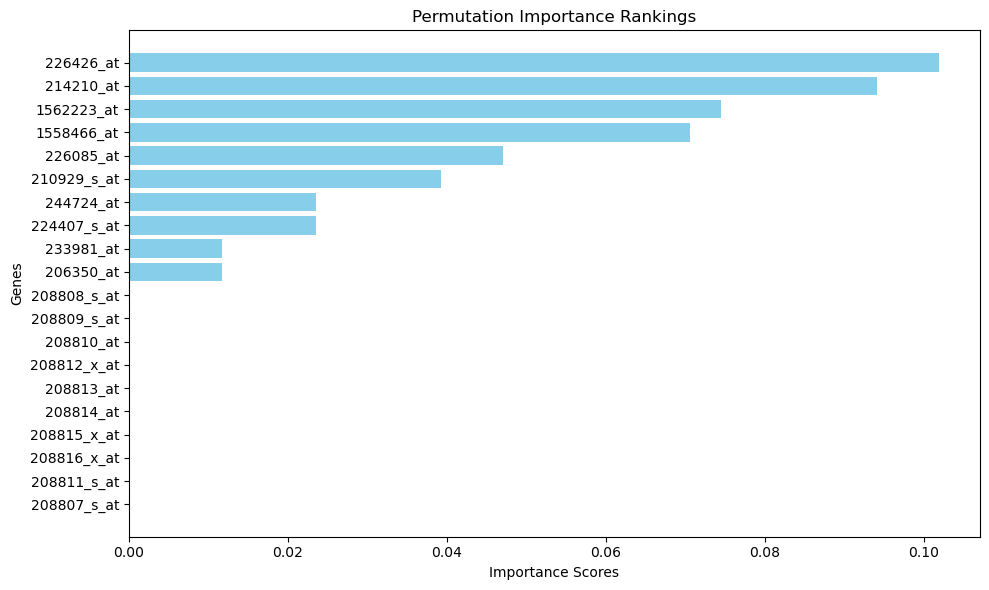

In [46]:
import matplotlib.pyplot as plt

# Assuming `gene_expression_data.columns` contains the gene names,
# and `result.importances_mean` contains their corresponding importance scores.

# Extract top 20 genes and their importance scores
top_20_genes = [gene_expression_data.columns[i] for i in top_20_indices]
top_20_scores = [result.importances_mean[i] for i in top_20_indices]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_20_genes, top_20_scores, color='skyblue')  # Horizontal bar graph
plt.xlabel('Importance Scores')
plt.ylabel('Genes')
plt.title('Permutation Importance Rankings')
plt.gca().invert_yaxis()  # To display the most important gene at the top
plt.tight_layout()
plt.show()

In [ ]:
# 상위 20개 유전자 목록 (유전자 이름만 추출)
top_genes = [
    "226426_at", "214210_at", "1562223_at", "1558466_at", "226085_at",
    "210929_s_at", "244724_at", "224407_s_at", "233981_at", "206350_at",
    "208808_s_at", "208809_s_at", "208810_at", "208812_x_at", "208813_at",
    "208814_at", "208815_x_at", "208816_x_at", "208811_s_at", "208807_s_at"
]

In [ ]:
# 상위 20개 유전자만 필터링
filtered_gene_expression_data = gene_expression_data[top_genes]
filtered_X = filtered_gene_expression_data.values  # NumPy 배열

## Anchor

In [16]:
from anchor import anchor_tabular

In [17]:
print(label_encoder.classes_)
print(gene_expression_data.columns)
print(X)
print(X.shape)
print(X[0].shape)

['normal_urothelia' 'tumoral_urothelia']
Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)
[[5.44855047 2.85547287 3.95639111 ... 2.63524305 3.0872959  2.74986292]
 [5.94820816 2.79552877 4.12591576 ... 2.31752635 2.7607569  2.86802983]
 [5.49623909 2.88156934 4.07656101 ... 2.32313295 2.69599462 2.6706242 ]
 ...
 [6.18813431 2.9007399  4.73405634 ... 2.1427781  2.38023166 2.29607142]
 [6.35865158 3.43926188 3.63315948 ... 2.16832783 2.30002383 2.28086162]
 [6.2930911  2.87422621 4.02052646 ... 2.1292677  2.28813348 2.32520466]]
(85, 54675)
(54675,)


In [18]:
# Anchor 분석
anc_explainer =  anchor_tabular.AnchorTabularExplainer(
    class_names=label_encoder.classes_,        # 클래스 이름
    feature_names=gene_expression_data.columns.tolist(),  # 특성 이름
    train_data=X
)



In [20]:
pbar.close()  

137it [03:36,  1.58s/it]


In [ ]:
from tqdm import tqdm

# 진행률 바 초기화
pbar = tqdm(total=100)  # coverage_samples와 동일

def wrapped_predict(X):
    global pbar
    print(X.shape)
    print(X)
    pbar.update(len(X))  # 배치 크기만큼 진행률 증가
    return rf.predict(X)

# 설명 생성
explanation = anc_explainer.explain_instance(
    X[0],
    wrapped_predict,
    min_samples_start=10,
    coverage_samples=500,
    batch_size=5,
    max_anchor_size=3,
    beam_size=5,
    verbose=True 
)

pbar.close()  # 작업 완료 후 닫기

  0%|          | 0/100 [00:00<?, ?it/s]

(1, 54675)
[[5.44855047 2.85547287 3.95639111 ... 2.63524305 3.0872959  2.74986292]]


 11%|█         | 11/100 [00:14<01:56,  1.30s/it]

(10, 54675)
[[5.96485757 3.10729949 3.98151958 ... 2.22465117 2.51472016 2.61015417]
 [6.12808873 2.92780516 4.29230445 ... 2.27888713 2.77529484 2.5679313 ]
 [6.1995071  3.24594841 5.48867759 ... 2.16024025 2.1865052  2.28313191]
 ...
 [6.52916566 2.9315975  4.30439823 ... 2.30096701 2.6603771  2.58151492]
 [6.1733767  3.01187042 4.05762168 ... 2.50372383 2.79479718 2.80548471]
 [6.1995071  3.24594841 5.48867759 ... 2.16024025 2.1865052  2.28313191]]


## LIME

In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:

# LIME explainer 생성
explainer = LimeTabularExplainer(
    training_data=X,  # Anchor 코드와 동일한 훈련 데이터
    feature_names=gene_expression_data.columns.tolist(),  # 특성 이름
    class_names=label_encoder.classes_,  # 클래스 이름
    mode='classification'  # 분류 모드
)

In [ ]:
from tqdm import tqdm

# 진행률 바 초기화
pbar = tqdm(total=100)  # num_samples와 동일

# 예측 함수에 진행률 바 추가
def wrapped_predict(X):
    global pbar
    pbar.update(len(X))  # 입력 샘플 수만큼 진행률 업데이트
    return rf.predict_proba(X)

# 설명 생성
exp = explainer.explain_instance(
    X[0],                  # 설명하려는 샘플
    wrapped_predict,       # 모델의 예측 확률 함수 (진행률 포함)
    num_features=20,       # 설명에 포함할 최대 특성 수
    num_samples=100        # 샘플링 횟수
)

# 진행률 바 닫기
pbar.close()

# 설명 결과 출력
print('Feature importances:')
for feature, importance in exp.as_list():
    print(f"{feature}: {importance}")


In [ ]:

exp.show_in_notebook()

AttributeError: 'Tree' object has no attribute 'explain_instance'

## SHAP

In [17]:
import numpy as np
import shap
print(shap.__version__)
print(np.__version__)


0.46.0
1.26.4


In [ ]:
# Gene 이름 로드
gene_names = pd.read_csv("converted_ids.txt", sep="\t", header=0)  # '\t'로 구분된 경우
gene_names_list = gene_names['samples'].tolist()  # 'samples' 열을 리스트로 변환
print(len(gene_names_list))
type(X)

In [ ]:
# X 데이터를 pandas DataFrame으로 변환 (X는 numpy 배열이라고 가정)
X_df = pd.DataFrame(X, columns=gene_names_list)  # 열 이름에 gene 이름 매핑
print(X_df)

In [82]:
# SHAP 분석
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Base value (기준값)
base_value = explainer.expected_value  # 모델의 기본 예상 출력값

print(f"Base Value (Expected Value): {base_value}")


Base Value (Expected Value): [0.42372881 0.57627119]


In [84]:
print(shap_values.shape)

(85, 54675, 2)


In [85]:
# SHAP 값 구조 변경
reshaped_shap_values = np.transpose(shap_values, (2, 0, 1))  # 클래스 수, 샘플 수, 특성 수
print(f"Reshaped shap_values shape: {reshaped_shap_values.shape}")


Reshaped shap_values shape: (2, 85, 54675)


In [86]:
# 클래스 1에 대한 SHAP 값
class_1_shap_values = reshaped_shap_values[1]
print(f"class_1_shap_values shape: {class_1_shap_values.shape}")  # 예상: (샘플 수, 특성 수)


class_1_shap_values shape: (85, 54675)


In [87]:
# 샘플 단위로 특성별 SHAP 값 합산
shap_values_sum = class_1_shap_values.sum(axis=1)
print(f"shap_values_sum shape: {shap_values_sum.shape}")  # 예상: (샘플 수,)

# Base value를 샘플 수에 맞게 확장
base_value_for_all = np.full_like(shap_values_sum, base_value[1])  # 클래스 1 기준 base_value

# 모델의 예측값 (클래스 1 확률)
predictions = rf.predict_proba(X)[:, 1]  # 클래스 1에 대한 확률


shap_values_sum shape: (85,)


In [88]:
# SHAP 검증
is_valid = np.allclose(shap_values_sum + base_value_for_all, predictions, atol=1e-6)
print("SHAP 검증 결과 (True면 일치):", is_valid)


SHAP 검증 결과 (True면 일치): True


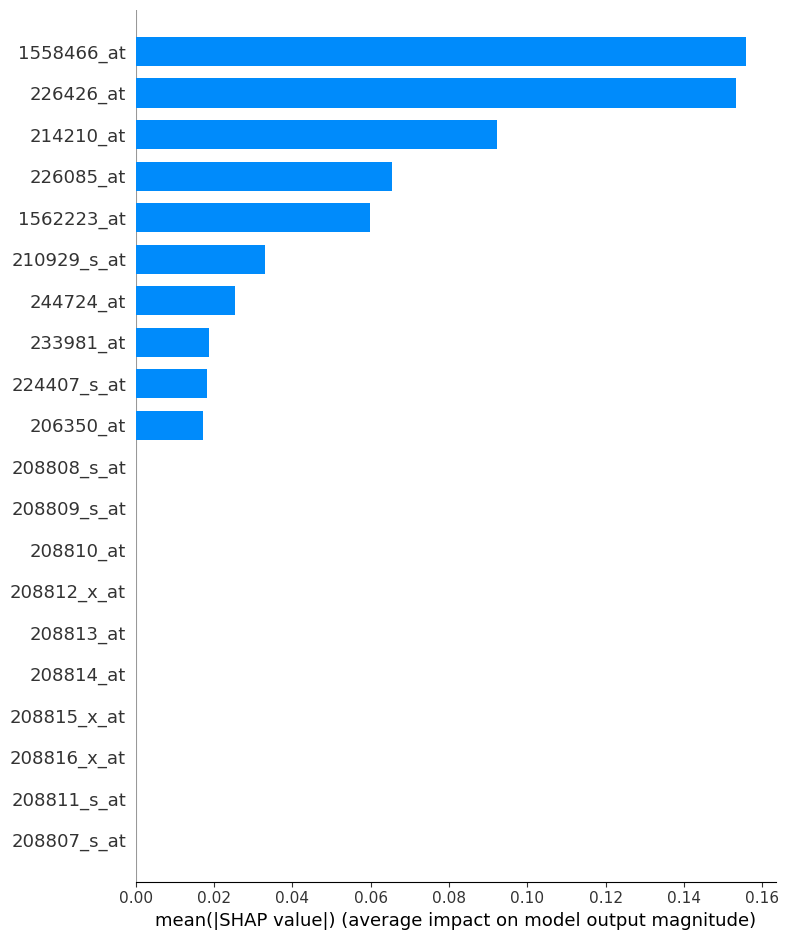

In [93]:

# 주요 결과 시각화
# 1. 각 피처의 전체 중요도 (Summary Plot)
shap.summary_plot(class_1_shap_values, X, feature_names=gene_names_list, plot_type='bar')

shap.initjs()
# 첫 번째 클래스 선택
class_index = 0  # 분석하려는 클래스의 인덱스 (예: 첫 번째 클래스)
sample_index = 0  # 분석하려는 샘플의 인덱스

shap.force_plot(
    explainer.expected_value[class_index],  # 선택한 클래스의 Base value
    shap_values[sample_index, :, class_index],  # 해당 클래스의 SHAP 값
    X[sample_index, :]  # 샘플 데이터
)


In [79]:
# 모델의 예측값
predictions = rf.predict_proba(X)[:, 1]  # 클래스 1에 대한 확률 (필요 시 수정)

# SHAP 값의 합 계산 (클래스 1 기준)
shap_values_sum = shap_values[1].sum(axis=1)  # 클래스 1의 SHAP 값 합

# SHAP 검증
is_valid = (shap_values_sum + base_value[1]) == predictions
print("SHAP 검증 결과 (True면 일치):", is_valid.all())


ValueError: operands could not be broadcast together with shapes (54675,) (85,) 

In [81]:
print(f"shap_values[1] shape: {shap_values[1].shape}")  # 예상: (샘플 수, 특성 수)
print(f"shap_values shape: {np.array(shap_values).shape}")  # 예상: (클래스 수, 샘플 수, 특성 수)



shap_values[1] shape: (54675, 2)
shap_values shape: (85, 54675, 2)


In [ ]:

# 주요 결과 시각화
# 1. 각 피처의 전체 중요도 (Summary Plot)
shap.summary_plot(shap_values, X)

shap.initjs()
# 첫 번째 클래스 선택
class_index = 0  # 분석하려는 클래스의 인덱스 (예: 첫 번째 클래스)
sample_index = 0  # 분석하려는 샘플의 인덱스

shap.force_plot(
    explainer.expected_value[class_index],  # 선택한 클래스의 Base value
    shap_values[sample_index, :, class_index],  # 해당 클래스의 SHAP 값
    X[sample_index, :]  # 샘플 데이터
)


In [35]:
# SHAP 시각화
shap.force_plot(
    explainer.expected_value[class_index],  # 기준값
    shap_values[sample_index, :, class_index],  # SHAP 값
    X_df.iloc[sample_index, :]  # gene 이름이 포함된 샘플 데이터
)

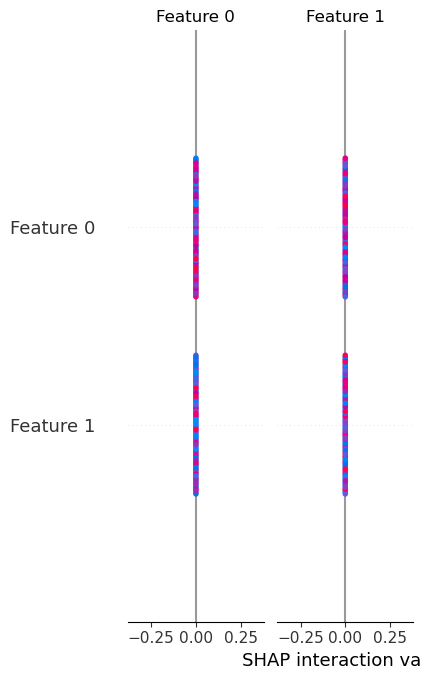

In [77]:
shap.summary_plot(shap_values, X, plot_type="dot")

In [76]:
# SHAP 값만 추출 (첫 번째 차원만 사용)
shap_values_main = shap_values[..., 0]  # 세 번째 차원의 첫 번째 값 추출
print(shap_values_main.shape)  # 출력: (85, 54675)

# DataFrame으로 변환
shap_df = pd.DataFrame(shap_values_main, columns=gene_names_list)

# 특정 Feature의 요약 통계 확인
feature_name = "1007_s_at"  # 또는 실제 Feature 이름
print(shap_df[feature_name].describe())


(85, 54675)
count    85.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: 1007_s_at, dtype: float64


In [63]:
print(type(shap_values))
print(len(shap_values))
print(type(X_df))
print(X_df.columns)
print(len(shap_values), X_df.shape[0])
print(shap_values[1][:5]) 




<class 'numpy.ndarray'>
85
<class 'pandas.core.frame.DataFrame'>
Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)
85 85
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [59]:
print(X_df.describe())


       1007_s_at    1053_at     117_at     121_at  1255_g_at    1294_at  \
count  85.000000  85.000000  85.000000  85.000000  85.000000  85.000000   
mean    6.084854   2.962670   4.378197   7.038022   2.618558   4.878690   
std     0.512934   0.175281   0.877333   0.464239   0.248807   0.316806   
min     4.452496   2.673688   3.204108   5.915698   2.066886   4.049038   
25%     5.834190   2.855350   3.940801   6.828945   2.478978   4.714094   
50%     6.117643   2.946359   4.115048   7.121014   2.609102   4.846280   
75%     6.362222   3.027127   4.462724   7.254164   2.742771   5.031352   
max     7.884884   3.625468   7.928701   8.040460   3.241641   6.639956   

         1316_at    1320_at  1405_i_at    1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
count  85.000000  85.000000  85.000000  85.000000  ...             85.000000   
mean    5.237477   3.172892   3.873107   2.801060  ...             12.542475   
std     0.409829   0.245897   1.508950   0.165207  ...              0.698775   
min 

In [61]:
print(rf.predict(X))
print(len(shap_values))  # 2 (클래스 0과 클래스 1의 SHAP 값)
print(shap_values[0].shape)  # (샘플 수, feature 수)
print(shap_values[1].shape)  # (샘플 수, feature 수)


[0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0]
85
(54675, 2)
(54675, 2)


In [18]:

# 평가
print("훈련 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)) )


훈련 세트 정확도: 0.847
테스트 세트 정확도: 0.654


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestClassifier
params = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [5, 10, 15, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Create RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with training data
grid_cv.fit(X_train, y_train)

# Get the best estimator and predict on the validation set
best_rf_clf = grid_cv.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Print the best parameters and the best score
print("최적 하이퍼 파라미터:\n", grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

# Evaluate the model on validation data
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=1

# XGBoost

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, brier_score_loss, roc_auc_score



In [100]:
# 모델 학습
bst = XGBClassifier(
    objective='binary:logistic',
    max_depth=6,
    eta=0.1,
    eval_metric='logloss'
).fit(X_train, y_train)


In [101]:

# 예측 확률값 (클래스 1의 확률)
y_pred_proba = bst.predict_proba(X_test)[:, 1]  # 확률값 추출

# 예측 클래스 (클래스 1 확률 > 0.5 인 경우 1로 분류)
y_pred = (y_pred_proba > 0.5).astype(int)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report 출력
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Brier Score 계산 (클래스 1 확률값 사용)
brier_score = brier_score_loss(y_test, y_pred_proba)
print(f"\nBrier Score: {brier_score:.4f}")

# AUC 계산 (클래스 1 확률값 사용)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")

Accuracy: 61.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.71      0.62      0.67        16

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.63      0.62      0.62        26


Brier Score: 0.2459
AUC: 0.6438


In [120]:
# PFI 계산
result = permutation_importance(
    bst, 
    X, 
    y, 
    scoring='accuracy', 
    n_repeats=3, 
    n_jobs=-1, 
    random_state=42
)


# 중요도 정렬 (상위 20개)
sorted_indices = result.importances_mean.argsort()[::-1]  # 중요도 기준 내림차순 정렬
top_20_indices = sorted_indices[:20]  # 상위 20개 인덱스 추출

# 상위 20개 특성 출력
print("Top 20 Features by Importance:")
for i in top_20_indices:
    print(f"{gene_expression_data.columns[i]}: {result.importances_mean[i]:.3f}")

Top 20 Features by Importance:
228460_at: 0.051
1558942_at: 0.027
225691_at: 0.008
203208_s_at: 0.008
235805_at: 0.008
1556352_at: 0.008
235800_at: 0.008
1557116_at: 0.004
222890_at: 0.004
206698_at: 0.004
1567697_at: 0.004
1562579_at: 0.004
208811_s_at: 0.000
AFFX-TrpnX-M_at: 0.000
208812_x_at: 0.000
208809_s_at: 0.000
208813_at: 0.000
208814_at: 0.000
208810_at: 0.000
208806_at: 0.000


In [ ]:
# SHAP 분석
explainer = shap.TreeExplainer(bst.get_booster())
shap_values = explainer.shap_values(X)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 627: invalid continuation byte

In [ ]:
# SHAP 값 시각화
shap.summary_plot(shap_values, X)

# DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [64]:
# 모델 생성
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# 모델 학습
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

# 클래스 1 확률값 예측
y_pred_proba = clf.predict_proba(X_test)[:, 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Brier Score 계산 (클래스 1 확률값 사용)
brier_score = brier_score_loss(y_test, y_pred_proba)
print(f"\nBrier Score: {brier_score:.4f}")

# AUC 계산 (클래스 1 확률값 사용)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")


Accuracy: 0.42


In [ ]:
# PFI 계산
result = permutation_importance(
    clf, 
    X, 
    y, 
    scoring='accuracy', 
    n_repeats=3, 
    n_jobs=-1, 
    random_state=42
)



# 중요도 정렬 (상위 20개)
sorted_indices = result.importances_mean.argsort()[::-1]  # 중요도 기준 내림차순 정렬
top_20_indices = sorted_indices[:20]  # 상위 20개 인덱스 추출

# 상위 20개 특성 출력
print("Top 20 Features by Importance:")
for i in top_20_indices:
    print(f"{gene_expression_data.columns[i]}: {result.importances_mean[i]:.3f}")

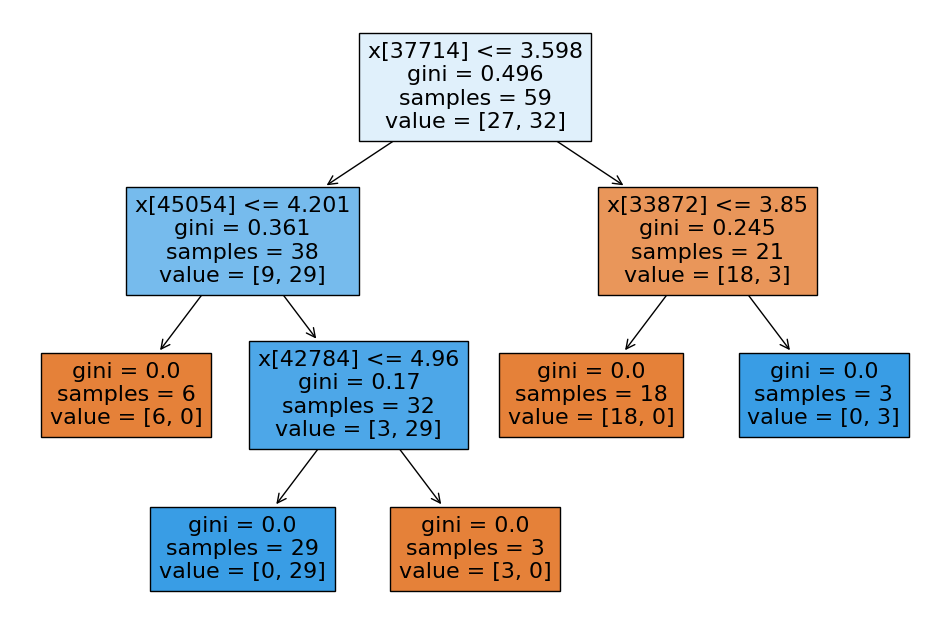

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()


# KNeighborsClassifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
# 3. 모델 생성 및 학습
# n_neighbors는 K값을 설정 (기본값: 5)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
# 4. 예측
y_pred = knn.predict(X_test)


In [72]:
# 5. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.54


# SVC(Support Vector Classifier)

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [74]:

# 2. SVC 모델 정의
svc = SVC(kernel='linear', C=1.0, random_state=42)  # kernel='linear', 'rbf', 'poly' 등 선택 가능


In [75]:

# 3. 모델 학습
svc.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


# GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [81]:
# Gaussian Naive Bayes 모델 생성
model = GaussianNB()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5769230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.67      0.62      0.65        16

    accuracy                           0.58        26
   macro avg       0.56      0.56      0.56        26
weighted avg       0.59      0.58      0.58        26



# LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:

# Logistic Regression 모델 생성
model = LogisticRegression(max_iter=200)  # 반복 횟수 설정

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.78      0.88      0.82        16

    accuracy                           0.77        26
   macro avg       0.76      0.74      0.75        26
weighted avg       0.77      0.77      0.76        26



/home/younggun0816/anaconda3/envs/Bladder/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
